In [1]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.m4_data_loader import M4DataLoader
from src.visualization import *
from src.evaluation import *
from src.data_augmentations import *
from src.m4_model import M4Model
from src.berken_error import *
from src.m4_evaluation_loss_functions import *


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline
keras.backend.set_floatx('float64')

Using TensorFlow backend.


# Load Data

In [2]:
EPOCHS = 30
BATCH_SIZE = 120
LOOKBACK = 652
HORIZON = 48
HIDDEN_LAYER_SIZE =80
FEATURES_NUMBER = 1
OUTPUT_SIZE = HORIZON*3
LOSS = qd_objective_lstm_c
PI_PARAMS = {'max_coff': 0.25, 'min_coff': 0.15, 'step': 0.1}

stdAugmentation = StdAugmentation(PI_PARAMS)
diffAugmentation = DiffAugmentation()
x_augmentations = []
y_augmentations = []

data_loader = M4DataLoader("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv", 
                           x_augmentations, 
                           y_augmentations,
                           LOOKBACK, HORIZON,  validation_ratio=0.05)

train_x, train_y = data_loader.get_training_data()
test_x, test_y = data_loader.get_test_data()
validate_x, validate_y = data_loader.get_validation_data()

training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE, FEATURES_NUMBER)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE, FEATURES_NUMBER)
validation_data_generator = M4Generator(validate_x, validate_y, BATCH_SIZE, FEATURES_NUMBER)

# Train The Model

In [7]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=0, mode='auto')
#callback1 = EarlyStoppingByLossVal(monitor='val_loss', value=0.5, verbose=1)

model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
                output_size=OUTPUT_SIZE, learning_rate=0.01, loss = LOSS,
                dropout_ratio = 0.4, features_number = FEATURES_NUMBER, callbacks = [], pi_params=PI_PARAMS)

In [9]:
model.load( '../models/berken/1-LSTM/7')
model.compile()
model.train(training_data_generator, test_data_generator, epochs=100)

hist = model.evaluate(validation_data_generator)
print(hist)

Loaded model from disk
Epoch 1/100
3/3 [==============================] - 5s 2s/step - loss: 8985.1299 - val_loss: 73.4140
Epoch 2/100
3/3 [==============================] - 5s 2s/step - loss: 961.8524 - val_loss: 406.0077
Epoch 3/100
3/3 [==============================] - 5s 2s/step - loss: 539.2267 - val_loss: 646.7672
Epoch 4/100
3/3 [==============================] - 5s 2s/step - loss: 153.2383 - val_loss: 77.3582
Epoch 5/100
3/3 [==============================] - 5s 2s/step - loss: 57.6490 - val_loss: 76.7900
Epoch 6/100
3/3 [==============================] - 5s 2s/step - loss: 60.6156 - val_loss: 69.9331
Epoch 7/100
3/3 [==============================] - 5s 2s/step - loss: 55.2985 - val_loss: 71.3141
Epoch 8/100
3/3 [==============================] - 5s 2s/step - loss: 61.9297 - val_loss: 77.6561
Epoch 9/100
3/3 [==============================] - 5s 2s/step - loss: 97.3247 - val_loss: 71.2143
Epoch 10/100
3/3 [==============================] - 5s 2s/step - loss: 53.6144 - val_los

IndexError: list index out of range

##### Save The Model

In [11]:
MODEL_BASE_DIR = '../models/berken/1-LSTM'
model.save(MODEL_BASE_DIR)

Saved model files to disk under../models/berken/1-LSTM/8


# Get Best And Worst Predictions

Best Predection Error is     0.7370
Worst Predection Error is    13.1021


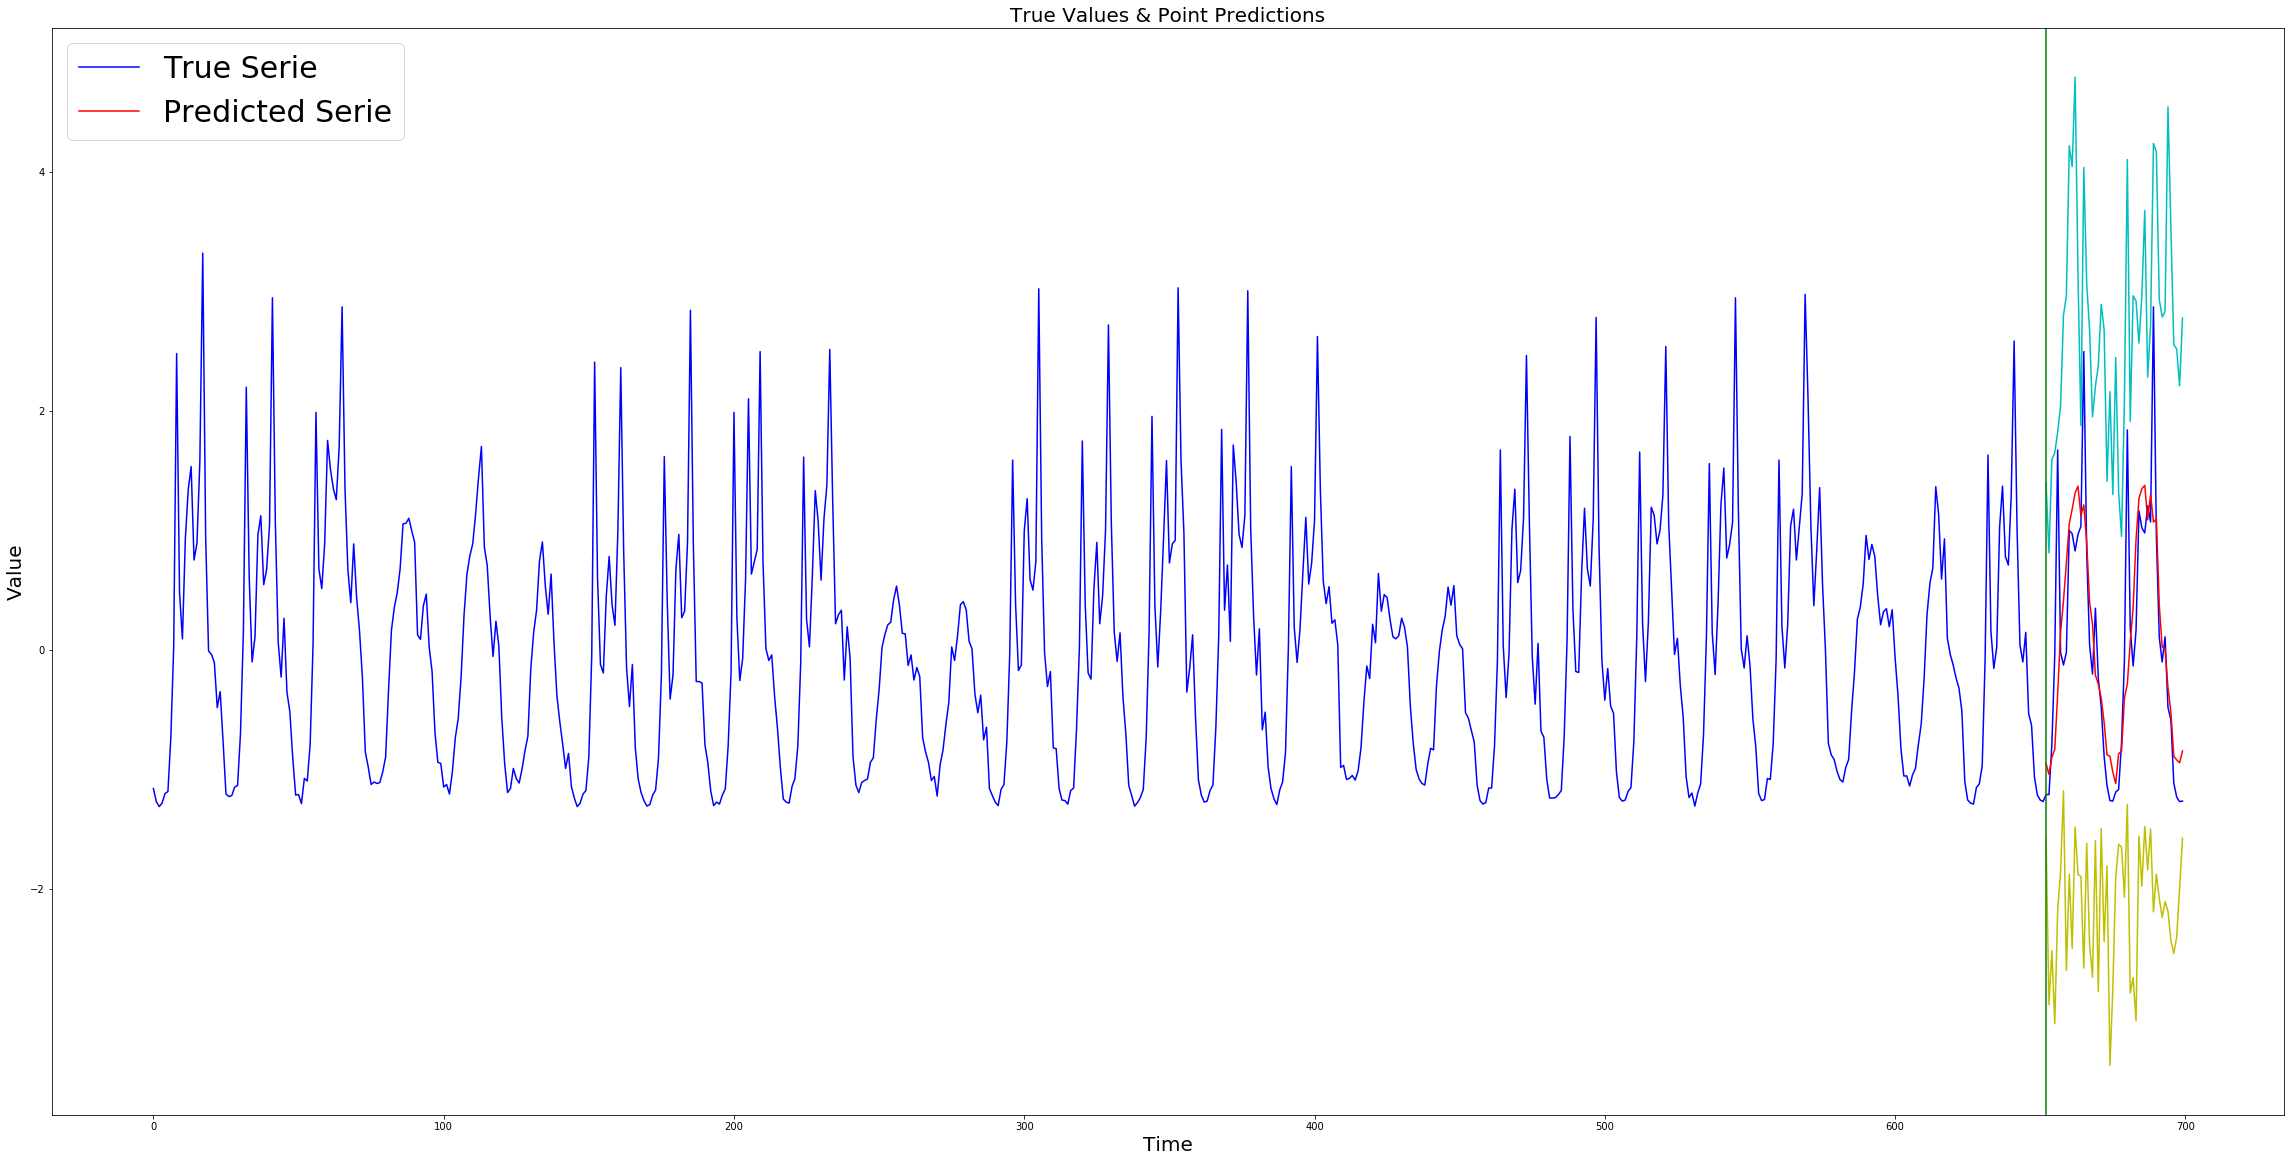

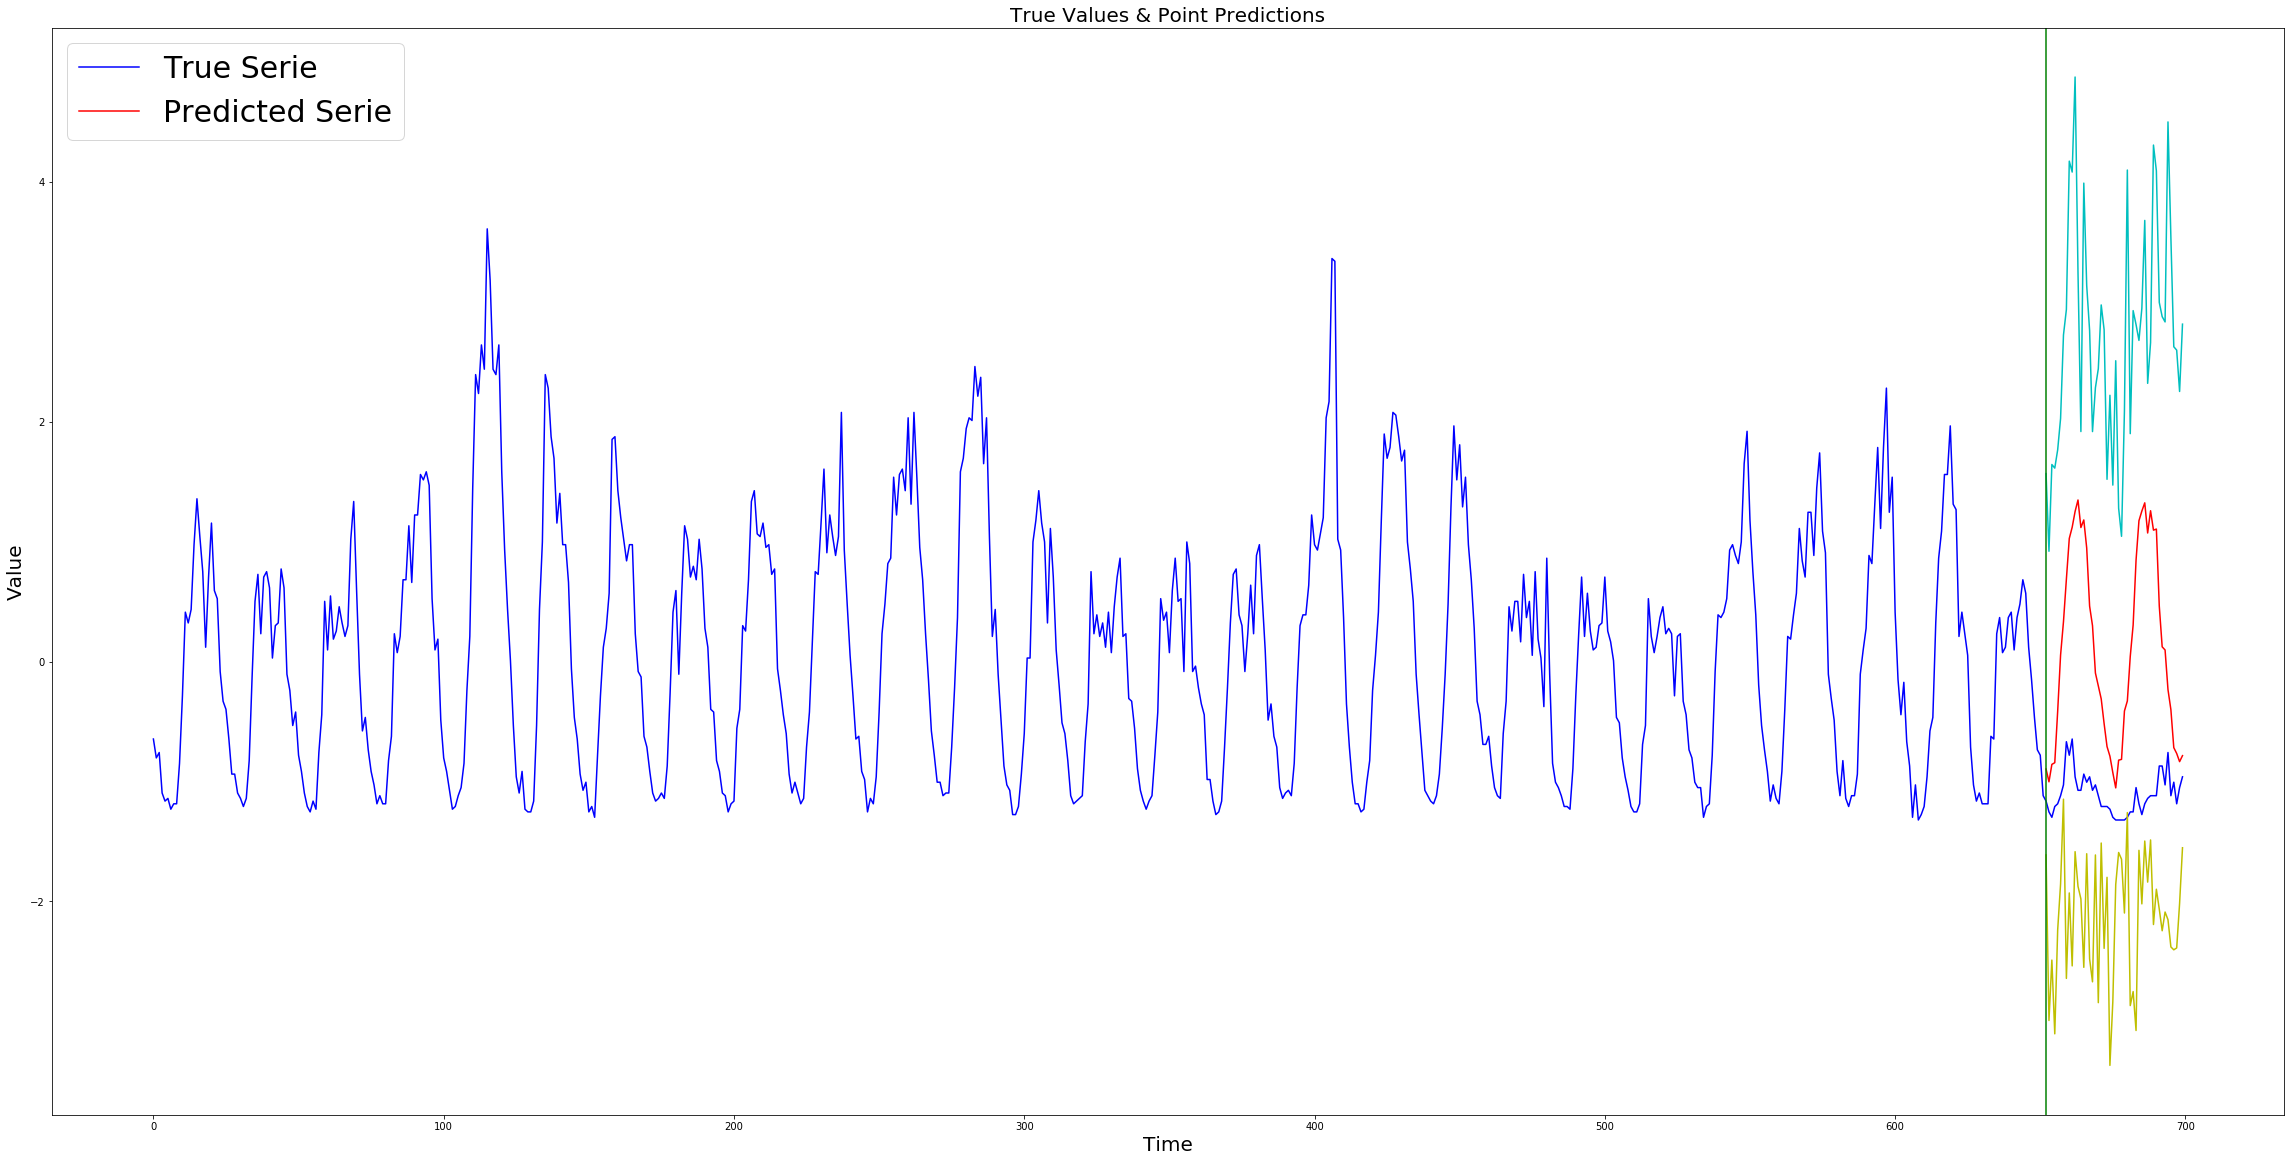

In [10]:
#model = M4Model()
#model.load('../models/berken/3-LSTM/2')
#print(hp)

x, y, prediction, error =  sort_by_prediction_error(model,test_x, test_y, mase)

print(f'Best Predection Error is {error[0]:10.4f}')
print(f'Worst Predection Error is {error[x.shape[0]-1]:10.4f}')

lower_bound = prediction[:,-48:]
upper_bound = prediction[:,48:-48]
plot_serie_with_bounds(x[:,:LOOKBACK], y[:,:48], prediction[:,:48], lower_bound, upper_bound, serie_indx=0)
plot_serie_with_bounds(x[:,:LOOKBACK], y[:,:48], prediction[:,:48], lower_bound, upper_bound, serie_indx=x.shape[0]-1)

# PLot Specific Serie From A Batch

In [3]:
IDX = 0
x = test_x[:BATCH_SIZE,:]
y = test_y[:BATCH_SIZE,:]
#============ Predict Test
predictedY = model.predict(x.reshape(BATCH_SIZE, LOOKBACK, -1 ))
#plot_series(test_x, test_y, predictedY, series_num=10)
plot_serie_and_prediction(x[:,:,0], y[:,:48], predictedY[:,:48], serie_indx=IDX)

NameError: name 'model' is not defined

# Evaluate A Model Against An Error Function

In [3]:
MODEL_NUMBER = 7
MODEL_BASE_DIR = '../models/berken/1-LSTM'
hyperparameters, training_error, test_error, validation_error = load_and_evaluate_model(f'{MODEL_BASE_DIR}/{MODEL_NUMBER}', 
                                                                       '../Dataset/Train/Hourly-train.csv', 
                                                                       '../Dataset/Test/Hourly-test.csv', mase)
print(f'Hyperparameters : {hyperparameters}')
print(f'Training Error For Model ({MODEL_NUMBER}) : {training_error}')
print(f'Test Error For Model ({MODEL_NUMBER}) : {test_error}')
print(f'Validation Error For Model ({MODEL_NUMBER}) : {validation_error}')

Loaded model from disk
Hyperparameters : {'epochs': 30, 'learning_rate': 0.01, 'batch_size': 120, 'hidden_layer_size': 80, 'lookback': 652, 'loss': 'qd_objective_lstm_c', 'dropout_ratio': 0.4, 'features_number': 1, 'output_size': 144, 'pi_params': {'max_coff': 0.25, 'min_coff': 0.15, 'step': 0.1}}
Training Error For Model (7) : 2.015
Test Error For Model (7) : 2.43
Validation Error For Model (7) : 1


# Evaluate Model PIs

In [11]:
#model = M4Model()
#model.load('../models/berken/3-LSTM/4')

y = test_y[:,:HORIZON]
x = test_x[:,:]
print(x.shape)

predictedY = model.predict(test_x)
lower_bound = predictedY[:,-48:]
upper_bound = predictedY[:,48:-48]

print(acd(y, lower_bound, upper_bound))
print(msis(x, y, lower_bound, upper_bound))

(394, 48)
0.019278764805414572
29.90982085049515


In [12]:
y = test_y[:,:HORIZON]
lower, upper = naive_pi(y)
print(acd( y[:,:-1], lower, upper))
print(msis(test_x[:,:,0],  y[:,:-1], lower, upper))

0.0462738956690788
15.255543340076647


In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(40, 20))
    
true_series_time_axes = np.arange(0, 48)
axs.plot(true_series_time_axes, test_y[0,:48], color='r')
axs.plot(true_series_time_axes, test_y[0,:48] - test_y[0,48:], color='y')
axs.plot(true_series_time_axes, test_y[0,:48] + test_y[0,48:], color='c')

print(test_y[0,:48].min() )
print( (test_y[0,:48] - test_y[0,48:]).min())
print( (test_y[0,:48] + test_y[0,48:]).min())

In [ ]:
lower_bounds = test_y[:,:48] - test_y[:,-48:]
upper_bounds = test_y[:,:48] + test_y[:,-48:]

for y, lower, upper in zip(test_y, lower_bounds, upper_bounds):
    fig, axs = plt.subplots(1, 1, figsize=(40, 20))
    true_series_time_axes = np.arange(0, 48)
    axs.plot(true_series_time_axes, y[:48], color='b')
    axs.plot(true_series_time_axes, lower, color='y')
    axs.plot(true_series_time_axes, upper, color='c')
    plt.show()